In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]



In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(5, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

In [10]:
import os
from os import listdir
from os.path import join, isfile

import numpy as np
from PIL import Image
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

batch_size = 8

# Define the data generators
#train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1,
                                       rotation_range=0,
                                       zoom_range=0,
                                       width_shift_range=0,
                                       height_shift_range=0,
                                       shear_range=0,
                                       horizontal_flip=False,
                                       fill_mode="nearest")
    

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset and split it into train and validation sets
train_dataset = train_datagen.flow_from_directory('D:/jupyter notebook/DataSet/Processed_10000_FirstGA_other/train',
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='training')

valid_dataset = train_datagen.flow_from_directory('D:/jupyter notebook/DataSet/Processed_10000_FirstGA_other/train',
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='validation')

test_dataset = test_datagen.flow_from_directory('D:/jupyter notebook/DataSet/Processed_10000_FirstGA_other/test',
                                                target_size=(224, 224),
                                                batch_size=batch_size,
                                                class_mode='categorical')

# Define the class labels
class_labels = ['FMD', 'KCD', 'LD', 'RWD', 'WD']


Found 7071 images belonging to 5 classes.
Found 783 images belonging to 5 classes.
Found 2324 images belonging to 5 classes.


In [11]:
print(len(train_dataset))
print(len(valid_dataset))
print(len(test_dataset))

884
98
291


In [12]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)


In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss=loss_fn,
  optimizer=optimizer,
  metrics=['accuracy']
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  train_dataset,
  validation_data=valid_dataset,
  epochs=50,
  steps_per_epoch=len(train_dataset),
  validation_steps=len(valid_dataset)
)

Epoch 1/50
343/884 [==========>...................] - ETA: 4:00 - loss: 0.4585 - accuracy: 0.8506

In [9]:
model_history = r.history
loss_accuracy_train = model.evaluate(train_dataset)
print("Training Loss: {:.4f}".format(loss_accuracy_train[0]))
print("Training Accuracy: {:.2%}".format(loss_accuracy_train[1]))
loss_accuracy = model.evaluate(test_dataset)
print("Test Loss: {:.4f}".format(loss_accuracy[0]))
print("Testing Accuracy: {:.2%}".format(loss_accuracy[1]))

NameError: name 'r' is not defined

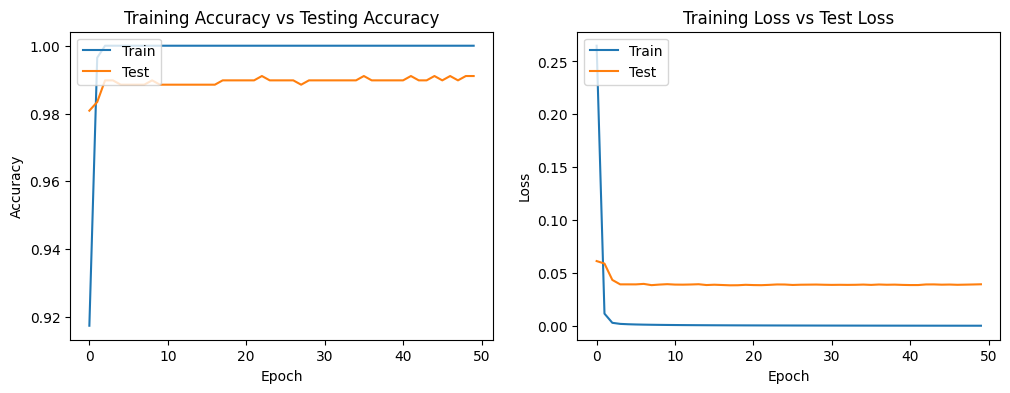

In [47]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(r.history['accuracy'])
ax[0].plot(r.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Testing Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='upper left')

ax[1].plot(r.history['loss'])
ax[1].plot(r.history['val_loss'])
ax[1].set_title('Training Loss vs Test Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='upper left')

plt.show()

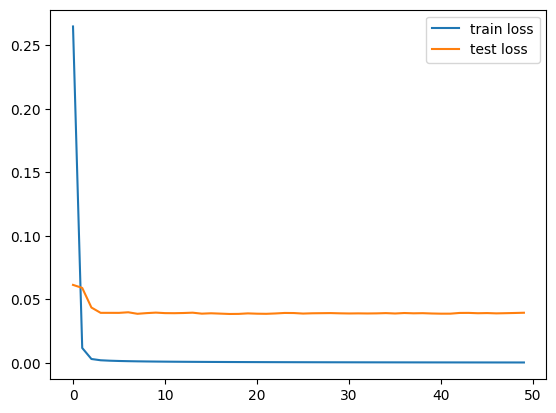

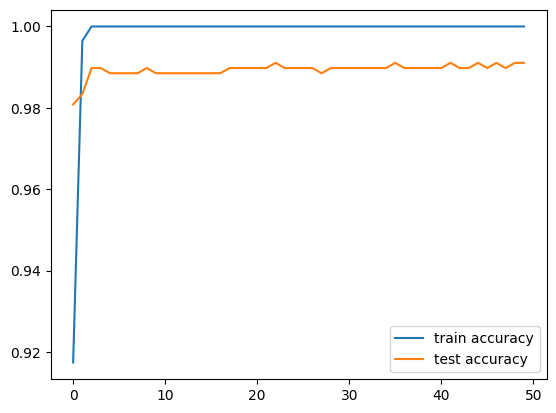

<Figure size 640x480 with 0 Axes>

In [50]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions for the test dataset
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=0)

# Convert labels from one-hot encoding to integers
y_true = np.argmax(class_labels, axis=0)

# Generate and print the classification report and confusion matrix
print(classification_report(y_true, y_pred, target_names=class_labels))
print(confusion_matrix(y_true, y_pred))


291/291 [==============================] - 93s 318ms/step


TypeError: Singleton array 4 cannot be considered a valid collection.

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred = model.predict(test_dataset)
y_true = np.array(r.history['accuracy'])
train_loss = r.history['loss']
# Define your true labels and predicted labels
y_true = np.array([2, 1, 3, 0, 4, 2, 1, 3, 0, 4]) # example true labels
y_pred = np.array([2, 1, 3, 0, 4, 1, 1, 2, 0, 4]) # example predicted labels

class_labels=["FMD","KCD","LD","RWD","WD"] # example class labels

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Calculate the classification report
classification_rep = classification_report(y_true, y_pred, target_names=class_labels)

# Print the classification report
print("Classification Report:")
print(classification_rep)


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

model_path = os.path.join(Saved_model_path, filename + '.h5')

# Load saved model
model = tf.keras.models.load_model(model_path)

# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(TestLoader)

# Print test accuracy
print("Test accuracy:", test_accuracy)

# Define empty arrays for storing true labels and predicted labels
true_labels = np.array([])
pred_labels = np.array([])

# Evaluate model on test set
model.eval()
with tf.no_gradient():
    for data, labels in TestLoader:
        data = data
        labels = labels

        # Get predictions and calculate accuracy
        outputs = model(data)
        preds = np.argmax(outputs, axis=1)
        true_labels = np.append(true_labels, labels)
        pred_labels = np.append(pred_labels, preds)

# Create confusion matrix
conf_mat = confusion_matrix(true_labels, pred_labels)

# Normalize confusion matrix to percentages
conf_mat_pct = 100 * conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# Print confusion matrix
print('Confusion matrix:')
print(conf_mat_pct)

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_mat_pct, cmap='Blues')

# Add color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

# Set axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Loop over data dimensions and create text annotations
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        ax.text(j, i, format(conf_mat_pct[i, j], '.2f') + '%',
                ha='center', va='center', color='white' if conf_mat[i, j] > conf_mat.max() / 2 else 'black')

# Set title
ax.set_title('Confusion matrix')

# Show plot
plt.show()

# Generate classification report
print(classification_report(true_labels, pred_labels, target_names=class_labels))

# Calculate accuracy score
acc = accuracy_score(true_labels, pred_labels)

# Calculate precision, recall, f1-score, support
precision, recall, f1score, support = precision_recall_fscore_support(true_labels, pred_labels)
